<a href="https://colab.research.google.com/github/Ballardmallard/PQHS416_Spring_25/blob/main/Homework_7_Stockdale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# HW 7 Graham Stockdale
# importing


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
# load the Reuters dataset
print("Loading Reuters dataset...")
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# looking at length and structure of train and test samples
print(len(train_data))
print(len(test_data))

# decode testing
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

Loading Reuters dataset...
2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
8982
2246
550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [3]:
# vectorizing the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# preparing the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Create validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [4]:
# evaluating model A
model_a = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model_a.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_a = model_a.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=32,
                      validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5175 - loss: 2.2081 - val_accuracy: 0.7770 - val_loss: 1.0084
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8473 - loss: 0.6958 - val_accuracy: 0.8250 - val_loss: 0.8440
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9312 - loss: 0.3198 - val_accuracy: 0.8160 - val_loss: 0.8490
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9468 - loss: 0.2315 - val_accuracy: 0.8120 - val_loss: 0.9142
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9556 - loss: 0.1750 - val_accuracy: 0.8100 - val_loss: 0.8626
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9595 - loss: 0.1422 - val_accuracy: 0.8020 - val_loss: 0.9103
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9622 - loss: 0.1248 - val_accuracy: 0.8110 - val_loss: 0.9239
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9638 - loss: 0.1085 - val_accu

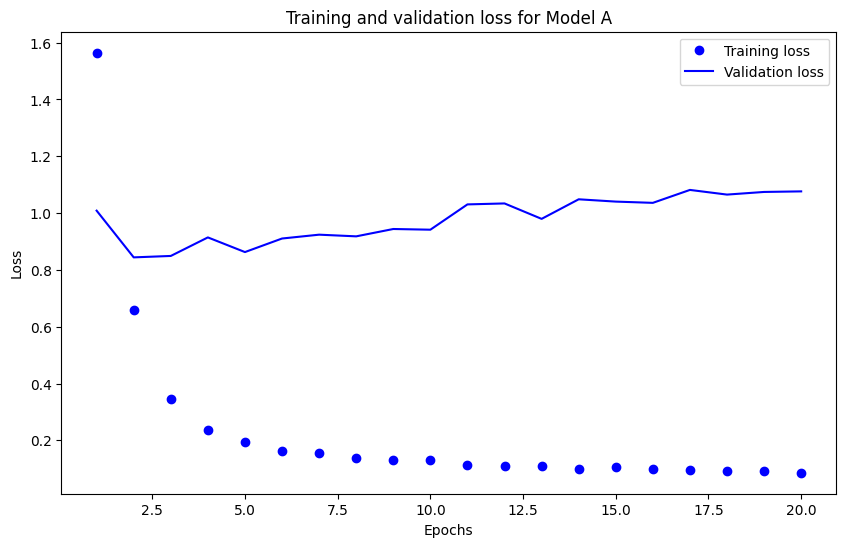

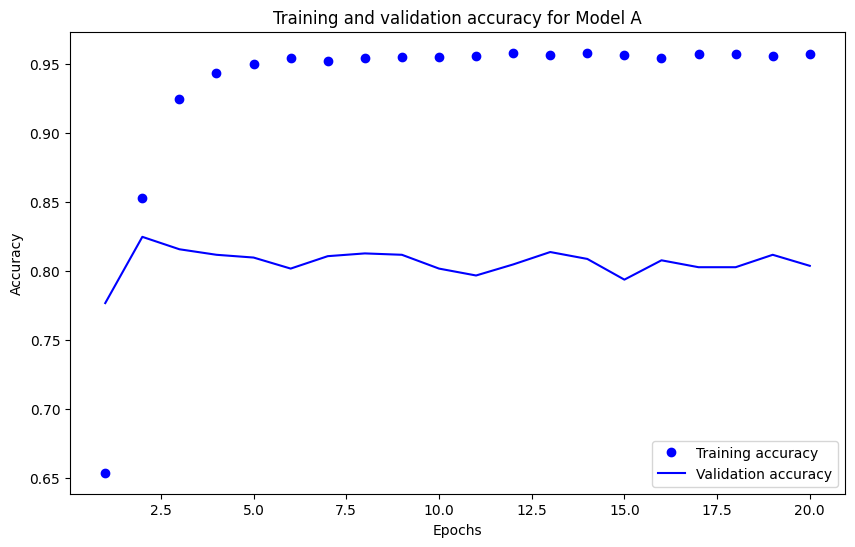

In [5]:
# plot results for model A
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for Model A')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_a.history['accuracy']
val_acc = history_a.history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy for Model A')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
# evaluate model A on validation data
results_a = model_a.evaluate(x_val, y_val)
print(f"Model A - Validation accuracy: {results_a[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8140 - loss: 1.0687
Model A - Validation accuracy: 0.8040


In [7]:
# model B
model_b = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model_b.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_b = model_b.fit(partial_x_train,
                      partial_y_train,
                      epochs=50,
                      batch_size=64,
                      validation_data=(x_val, y_val))

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5342 - loss: 2.3320 - val_accuracy: 0.7490 - val_loss: 1.1049
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8145 - loss: 0.8215 - val_accuracy: 0.7990 - val_loss: 0.8888
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9082 - loss: 0.4253 - val_accuracy: 0.8180 - val_loss: 0.8572
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9456 - loss: 0.2345 - val_accuracy: 0.8140 - val_loss: 0.8736
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9567 - loss: 0.1762 - val_accuracy: 0.8100 - val_loss: 0.8909
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9575 - loss: 0.1526 - val_accuracy: 0.8130 - val_loss: 0.8883
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9599 - loss: 0.1267 - val_accuracy: 0.8140 - val_loss: 0.8974
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9604 - loss: 0.1266 - val_accu

In [8]:
# evaluate model B
results_b = model_b.evaluate(x_val, y_val)
print(f"Model B - Validation accuracy: {results_b[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8008 - loss: 1.3998
Model B - Validation accuracy: 0.7990


In [9]:
# model C
model_c = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model_c.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_c = model_c.fit(partial_x_train,
                      partial_y_train,
                      epochs=50,
                      batch_size=128,
                      validation_data=(x_val, y_val))

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.4860 - loss: 2.5367 - val_accuracy: 0.7560 - val_loss: 1.1422
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8008 - loss: 0.8899 - val_accuracy: 0.7990 - val_loss: 0.9206
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9096 - loss: 0.4531 - val_accuracy: 0.8170 - val_loss: 0.8428
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9448 - loss: 0.2505 - val_accuracy: 0.8140 - val_loss: 0.8941
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9540 - loss: 0.2004 - val_accuracy: 0.8100 - val_loss: 0.8704
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9563 - loss: 0.1644 - val_accuracy: 0.8100 - val_loss: 0.9458
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9563 - loss: 0.1427 - val_accuracy: 0.8100 - val_loss: 0.9364
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9607 - loss: 0.1282 - val_accuracy: 0.8080 - v

In [10]:
# evaluate model c
results_c = model_c.evaluate(x_val, y_val)
print(f"Model C - Validation accuracy: {results_c[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8165 - loss: 1.1402
Model C - Validation accuracy: 0.8020


In [18]:
# model D: this is my model
model_d = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10000,)),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model_d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

history_d = model_d.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=128,
                      validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.2094 - loss: 3.4110 - val_accuracy: 0.5710 - val_loss: 3.2564
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.6579 - loss: 1.5349 - val_accuracy: 0.6040 - val_loss: 2.4737
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7444 - loss: 1.1003 - val_accuracy: 0.6350 - val_loss: 1.9481
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8072 - loss: 0.8310 - val_accuracy: 0.6610 - val_loss: 1.5492
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8394 - loss: 0.6622 - val_accuracy: 0.7060 - val_loss: 1.2935
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8648 - loss: 0.5262 - val_accuracy: 0.7510 - val_loss: 1.1135
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9009 - loss: 0.4000 - val_accuracy: 0.7750 - val_loss: 1.0089
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9146 - loss: 0.3411 - val_accuracy: 0.7750 - v

In [19]:
# evaluating my model (model D)
results_d = model_d.evaluate(x_val, y_val)
print(f"Model D - Validation accuracy: {results_d[1]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8199 - loss: 1.0623
Model D - Validation accuracy: 0.8090


In [22]:
# comparative results table
print("\n2. Comparative Results:")
print("=" * 80)
print(f"{'Model':<10} {'Model Architecture':<40} {'Batch':<10} {'Epochs':<10} {'Learning':<10} {'Validation'}")
print(f"{'':10} {'':40} {'Size':10} {'':10} {'Rate':10} {'Accuracy'}")
print("-" * 80)
print(f"{'A':<10} {'2 Dense layers (64, 64), ReLU':<40} {32:<10} {20:<10} {0.001:<10} {results_a[1]:.4f}")
print(f"{'B':<10} {'2 Dense layers (64, 128), ReLU':<40} {64:<10} {50:<10} {0.001:<10} {results_b[1]:.4f}")
print(f"{'C':<10} {'2 Dense layers (128, 128), ReLU':<40} {128:<10} {100:<10} {0.001:<10} {results_c[1]:.4f}")
print(f"{'D':<10} {'4 Dense Layers(256, 128, 128, 46), ReLU':<40} {128:<10} {20:<10} {0.0003:<10} {results_d[1]:.4f}")
print("=" * 80)


2. Comparative Results:
Model      Model Architecture                       Batch      Epochs     Learning   Validation
                                                    Size                  Rate       Accuracy
--------------------------------------------------------------------------------
A          2 Dense layers (64, 64), ReLU            32         20         0.001      0.8040
B          2 Dense layers (64, 128), ReLU           64         50         0.001      0.7990
C          2 Dense layers (128, 128), ReLU          128        100        0.001      0.8020
D          4 Dense Layers(256, 128, 128, 46), ReLU  128        20         0.0003     0.8090
